In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.datasets import fashion_mnist
from keras.utils import np_utils
import numpy as np

D:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


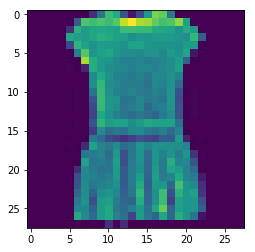

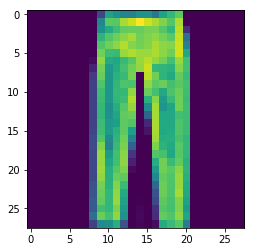

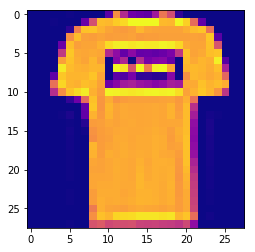

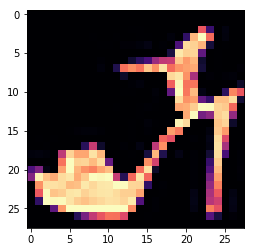

In [4]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
print(model.output_shape) # -> (None, 26, 26, 32)

model.add(Convolution2D(32, (3, 3), activation='relu'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

model.add(Dropout(0.25)) 

Instructions for updating:
Colocations handled automatically by placer.
(None, 26, 26, 32)
(None, 24, 24, 32)
(None, 12, 12, 32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 4608)
(None, 128)
(None, 10)


In [9]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [13]:
history = model.fit(X_train, y_train, batch_size=55, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2428 - acc: 0.9109
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.2228 - acc: 0.9185
Epoch 3/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.2116 - acc: 0.9221
Epoch 4/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.1989 - acc: 0.9264
Epoch 5/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1901 - acc: 0.9283
Epoch 6/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1781 - acc: 0.9330
Epoch 7/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1718 - acc: 0.9355
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1642 - acc: 0.9385
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1556 - acc: 0.9414
Epoch 10/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1529 - a

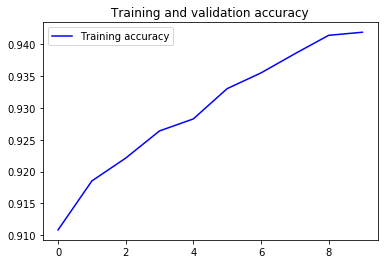

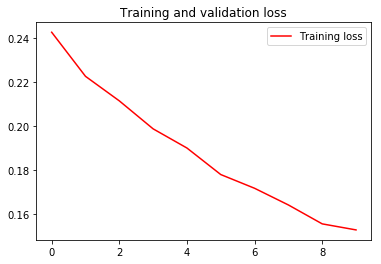

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['acc']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

In [15]:
predicted_classes = model.predict_classes(X_test)

score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 5s 537us/step
The accuracy is:  0.9224


## Really only just changed the epochs to 10, and the batch size to 55 and was able to get an accuracy of .92